In [1]:
import opendatasets as od

In [2]:
import os

In [3]:
os.listdir('stackoverflow-developer-survey-2020')

['README.txt', 'survey_results_public.csv', 'survey_results_schema.csv']

In [4]:
import pandas as pd

In [5]:
survey_fname = 'stackoverflow-developer-survey-2020/survey_results_public.csv'
survey_raw_df = pd.read_csv(survey_fname)

In [6]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [7]:
schema_fname = 'stackoverflow-developer-survey-2020/survey_results_schema.csv'
schema_raw = pd.read_csv(schema_fname)
# we can also set the index by using pd.read_csv(fname, index_col='column-name')

In [8]:
schema_raw

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [9]:
schema_raw.set_index('Column',inplace=True)

In [10]:
schema_raw

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [11]:
schema_raw.loc['YearsCodePro'].values

array(['NOT including education, how many years have you coded professionally (as a part of your work)?'],
      dtype=object)

In [12]:
# we can set multiple columns as our indexes for a dataset
schema_raw.set_index([pd.Series(range(0,61)),schema_raw.index])

,,QuestionText
,Column,
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."


In [13]:
schema_raw = schema_raw.QuestionText

# Data Preparation & Cleaning
While the survey responses contain a huge amount of information, we'll limit our analysis to the following areas:

--Demographics of the survey respondents and the global programming community

--Distribution of programming skills, experience, and preferences

--Employment-related information, preferences, and opinions


Let's select a subset of columns with the relevant data for our analysis.

In [67]:
selected_columns = [
    # Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    # Programming experience
     'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    # Employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [15]:
len(selected_columns)

20

In [16]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
survey_df.shape

(64461, 20)

In [18]:
schema  = schema_raw[selected_columns]
schema.shape

(20,)

In [19]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [20]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [21]:
for col in [ 'Age1stCode', 'YearsCode', 'YearsCodePro', 'Gender']:
    print(f'{col} : {survey_df[col].unique()}')

Age1stCode : ['13' '19' '15' '18' '16' '14' '12' '20' '42' '8' '25' '22' '30' '17' '21'
 '10' '46' '9' '7' '11' '6' nan '31' '29' '5' 'Younger than 5 years' '28'
 '38' '23' '27' '41' '24' '53' '26' '35' '32' '40' '33' '36' '54' '48'
 '56' '45' '44' '34' 'Older than 85' '39' '51' '68' '50' '37' '47' '43'
 '52' '85' '64' '55' '58' '49' '76' '72' '73' '83' '63']
YearsCode : ['36' '7' '4' '15' '6' '17' '8' '10' '35' '5' '37' '19' '9' '22' '30' '23'
 '20' '2' 'Less than 1 year' '3' '13' '25' '16' '43' '11' '38' '33' nan
 '24' '21' '12' '40' '27' '50' '46' '14' '18' '28' '32' '44' '26' '42'
 '31' '34' '29' '1' '39' '41' '45' 'More than 50 years' '47' '49' '48']
YearsCodePro : ['27' '4' nan '8' '13' '2' '7' '20' '1' '23' '3' '12' '17' '18' '10' '14'
 '29' '6' '28' '9' '15' '11' '16' '25' 'Less than 1 year' '5' '21' '19'
 '35' '24' '32' '22' '30' '38' '26' '40' '33' '31' 'More than 50 years'
 '34' '36' '39' '37' '41' '45' '47' '42' '46' '50' '43' '44' '48' '49']
Gender : ['Man' nan 'Woman' 'Ma

> Now we have to convert 'Age1stCode', 'YearsCode', 'YearsCodePro' columns into   numeric by using pd.to_numeric() method. Here we are mentioning              
  errors ='coerce' by which, if any string type data is present, then it is converted into np.Nan

In [22]:
for col in [ 'Age1stCode', 'YearsCode', 'YearsCodePro']:
    survey_df[col] = pd.to_numeric(survey_df[col], errors='coerce')

In [23]:
for col in [ 'Age1stCode', 'YearsCode', 'YearsCodePro']:
    print(f'{col} : {survey_df[col].unique()}')

Age1stCode : [13. 19. 15. 18. 16. 14. 12. 20. 42.  8. 25. 22. 30. 17. 21. 10. 46.  9.
  7. 11.  6. nan 31. 29.  5. 28. 38. 23. 27. 41. 24. 53. 26. 35. 32. 40.
 33. 36. 54. 48. 56. 45. 44. 34. 39. 51. 68. 50. 37. 47. 43. 52. 85. 64.
 55. 58. 49. 76. 72. 73. 83. 63.]
YearsCode : [36.  7.  4. 15.  6. 17.  8. 10. 35.  5. 37. 19.  9. 22. 30. 23. 20.  2.
 nan  3. 13. 25. 16. 43. 11. 38. 33. 24. 21. 12. 40. 27. 50. 46. 14. 18.
 28. 32. 44. 26. 42. 31. 34. 29.  1. 39. 41. 45. 47. 49. 48.]
YearsCodePro : [27.  4. nan  8. 13.  2.  7. 20.  1. 23.  3. 12. 17. 18. 10. 14. 29.  6.
 28.  9. 15. 11. 16. 25.  5. 21. 19. 35. 24. 32. 22. 30. 38. 26. 40. 33.
 31. 34. 36. 39. 37. 41. 45. 47. 42. 46. 50. 43. 44. 48. 49.]


In [24]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the maximum is 279. This is a common issue with surveys: responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be to ignore the rows where the age is higher than 100 years or lower than 10 years as invalid survey responses.

In [25]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

The same holds for `WorkWeekHrs`. Let's ignore entries where the value for the column is higher than 140 hours. (~20 hours per day).

In [26]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index, inplace = True)

The gender column also allows for picking multiple options. We'll remove values containing more than one option to simplify our analysis.

In [27]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

## Signature:
survey_df.where(
    cond,
    other=nan,
    inplace=False,
    axis=None,
    level=None,
    errors='raise',
    try_cast=False,
)

## Docstring:
Replace values where the condition is False.

Parameters
----------
### cond : bool Series/DataFrame, array-like, or callable

    --Where `cond` is True, keep the original value. Where
      False, replace with corresponding value from `other`.
      
    --If `cond` is callable, it is computed on the Series/DataFrame and
      should return boolean Series/DataFrame or array. The callable must
      not change input Series/DataFrame (though pandas doesn't check it).
    
    
### other : scalar, Series/DataFrame, or callable

    --Entries where `cond` is False are replaced with
      corresponding value from `other`.
      
    --If other is callable, it is computed on the Series/DataFrame and
      should return scalar or Series/DataFrame. The callable must not
      change input Series/DataFrame (though pandas doesn't check it).
    
### inplace : bool, default False

    Whether to perform the operation in place on the data.

## Signature: 
  survey_df.Gender.str.contains(pat, case=True, flags=0, na=nan, regex=True)
    
    
## Docstring:
Test if pattern or regex is contained within a string of a Series or Index.

Return boolean Series or Index based on whether a given pattern or regex is
contained within a string of a Series or Index.

na : default NaN >>> Fill value for missing values.

In [28]:
import numpy as np

In [29]:
survey_df.where(~(survey_df.Gender.str.contains(';', na=False)), np.nan, inplace=True)

In [30]:
survey_df.Gender.value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [31]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
18282,El Salvador,26.0,Man,Some college/university study without earning ...,"A business discipline (such as accounting, fin...",No,21.0,5.0,3.0,HTML/CSS;JavaScript;PHP;Python;TypeScript,JavaScript;Kotlin;Python;Ruby;Swift,Every few months,Meditate;Play games;Go for a walk or other phy...,Employed full-time,"Developer, back-end;Developer, full-stack;DevO...",7.0,Very dissatisfied,Flex time or a flexible schedule;Remote work o...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
46898,United States,38.0,Man,Some college/university study without earning ...,"Information systems, information technology, o...",Yes,16.0,22.0,17.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;S...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
62413,Nepal,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",Yes,19.0,5.0,1.0,NaN,NaN,NaN,NaN,Employed part-time,"Developer, full-stack",8.0,Neither satisfied nor dissatisfied,Flex time or a flexible schedule;Remote work o...,Sometimes: 1-2 days per month but less than we...,Fairly important
5519,Taiwan,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,4.0,2.0,HTML/CSS;JavaScript,HTML/CSS;JavaScript;TypeScript,Every few months,Meditate;Visit Stack Overflow,Employed full-time,"Developer, front-end",50.0,Neither satisfied nor dissatisfied,Financial performance or funding status of the...,Often: 1-2 days per week or more,Somewhat important
56254,Brazil,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,5.0,2.0,HTML/CSS;Java;JavaScript;Kotlin;Python;Ruby;Ru...,Java;Kotlin;Python;Rust,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",40.0,Slightly dissatisfied,"Flex time or a flexible schedule;Languages, fr...",Rarely: 1-2 days per year or less,Critically important
4726,United States,34.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16.0,16.0,12.0,C#;HTML/CSS;JavaScript;TypeScript,C#;HTML/CSS;JavaScript;TypeScript,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack;DevOps specialist;Engine...",45.0,Slightly satisfied,Flex time or a flexible schedule;How widely us...,Sometimes: 1-2 days per month but less than we...,Somewhat important
903,Mexico,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,7.0,2.0,C;C#;HTML/CSS;Java;JavaScript;Objective-C;PHP;...,Go;Kotlin;Ruby,Every few months,Meditate;Visit Stack Overflow;Do other work an...,Employed full-time,"Data or business analyst;Designer;Developer, d...",40.0,Very dissatisfied,Industry that I’d be working in;Financial perf...,Occasionally: 1-2 days per quarter but less th...,Very important
44372,Poland,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,17.0,11.0,5.0,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
56444,United Kingdom,41.0,"Non-binary, genderqueer, or gender non-conforming","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,6.0,35.0,20.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Once a year,Play games;Call a coworker or friend;Visit Sta...,"Indepe

In [32]:
schema['NEWStuck'], schema['NEWLearn'], schema['NEWEdImpt']

('What do you do when you get stuck on a problem? Select all that apply.',
 'How frequently do you learn a new language or framework?',
 'How important is a formal education, such as a university degree in computer science, to your career?')

## Exploratory Analysis and Visualization

Before we ask questions about the survey responses, it would help to understand the respondents' demographics, i.e., country, age, gender, education level, employment level, etc. It's essential to explore these variables to understand how representative the survey is of the worldwide programming community. A survey of this scale generally tends to have some [selection bias](https://en.wikipedia.org/wiki/Selection_bias).

Let's begin by importing `matplotlib.pyplot` and `seaborn`.

In [33]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [34]:
schema['Country']

'Where do you live?'

In [35]:
survey_df.Country.nunique()

183

In [36]:
top_countries = survey_df.Country.value_counts().head(15)

In [37]:
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

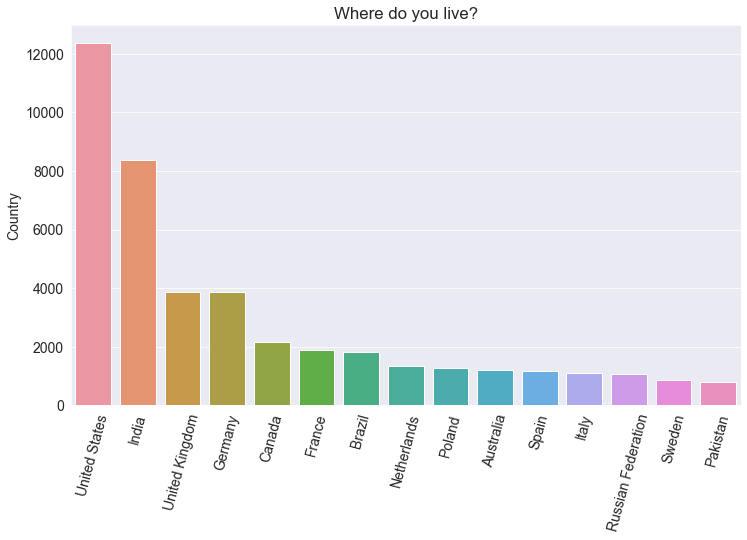

In [38]:
plt.figure(figsize = (12,7))
plt.title(schema.Country)
plt.xticks(rotation=75)
sns.barplot(x=top_countries.index, y=top_countries);

In [39]:
od.download('countries-languages-spoken')

Using downloaded and verified file: .\countries-languages-spoken\countries-languages.csv


In [40]:
os.listdir('countries-languages-spoken')

['countries-languages.csv']

In [41]:
coun_lang = pd.read_csv("countries-languages-spoken/countries-languages.csv", index_col='Country')

In [42]:
coun_lang

,Languages Spoken
Country,
Afghanistan,"Dari Persian, Pashtu (both official), other Tu..."
Albania,"Albanian (Tosk is the official dialect), Greek"
Algeria,"Arabic (official), French, Berber dialects"
Andorra,"Catalán (official), French, Castilian, Portuguese"
Angola,"Portuguese (official), Bantu and other African..."
...,...
Vietnam,Vietnamese (official); English (increasingly f...
Western Sahara (proposed state),"Hassaniya Arabic, Moroccan Arabic"
Yemen,Arabic


In [43]:
eng_spok = coun_lang[coun_lang['Languages Spoken'].str.contains('English')]

In [44]:
eng_spok

,Languages Spoken
Country,
Antigua and Barbuda,"English (official), local dialects"
Argentina,"Spanish (official), English, Italian, German, ..."
Australia,"English 79%, native and other languages"
Bahamas,"English (official), Creole (among Haitian immi..."
Bahrain,"Arabic, English, Farsi, Urdu"
...,...
United States,"English 82%, Spanish 11% (2000)"
Vanuatu,"Bislama 23% (a Melanesian pidgin English), Eng..."
Vietnam,Vietnamese (official); English (increasingly f...


In [45]:
eng_spok.loc['India']

Languages Spoken    Hindi 30%, English, Bengali, Gujarati, Kashmir...
Name: India, dtype: object

In [46]:
tot_resp = survey_df["Country"]
tot_resp

0                   Germany
1            United Kingdom
2        Russian Federation
3                   Albania
4             United States
                ...        
64456         United States
64457               Morocco
64458              Viet Nam
64459                Poland
64460                 Spain
Name: Country, Length: 64306, dtype: object

In [47]:
Eng_resp = 0
non_Eng_resp = 0

for con in survey_df["Country"]:
    if con in eng_spok.index:
        Eng_resp = Eng_resp +1
    else:
        non_Eng_resp = non_Eng_resp+1
        
Eng_resp, non_Eng_resp

(38645, 25661)

In [48]:
Eng_res_per = (Eng_resp/len(tot_resp))*100
NEng_res_per = (non_Eng_resp/len(tot_resp))*100

In [49]:
print("Percentage of responses from English-speaking Countries: ",Eng_res_per)
print("Percentage of responses from non-English-speaking Countries: ",NEng_res_per)

Percentage of responses from English-speaking Countries:  60.095480981556925
Percentage of responses from non-English-speaking Countries:  39.90451901844307


## Age Distribution

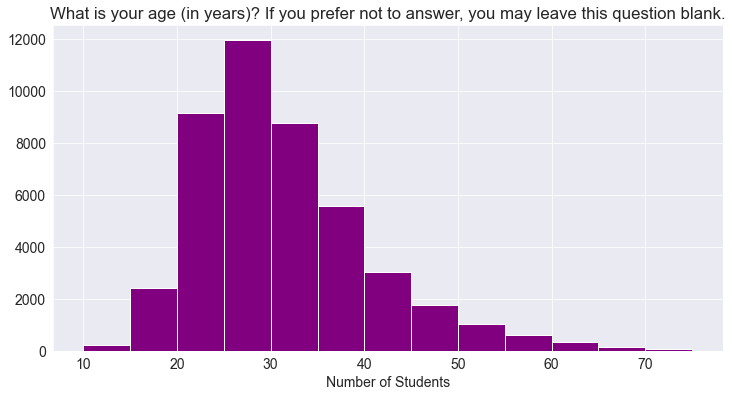

In [52]:
plt.figure(figsize = (12,6))
plt.title(schema['Age'])
plt.xlabel("Age")
plt.xlabel("Number of Students")
plt.hist(survey_df.Age, bins=np.arange(10,80,5), color='purple');

It appears that a large percentage of respondents are 20-45 years old. It's somewhat representative of the programming community in general. Many young people have taken up computer science as their field of study or profession in the last 20 years.

## Gender
Let's look at the distribution of responses for the Gender. It's a well-known fact that women and non-binary genders are underrepresented in the programming community, so we might expect to see a skewed distribution here.

In [59]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [75]:
gender_counts = survey_df.Gender.value_counts(dropna=False)
gender_counts
# Here the NAN values also included
# value_counts does not include null values defaultly "(dropna=True) --default"

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

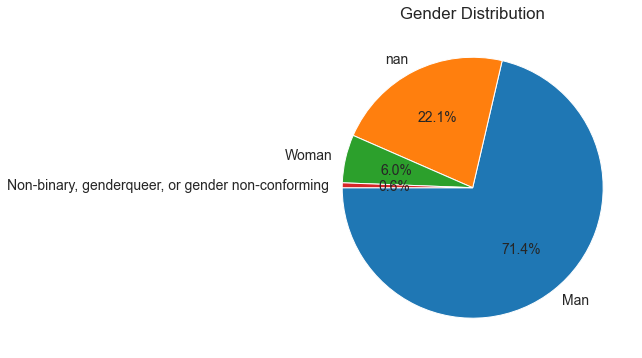

In [66]:
plt.figure(figsize=(12, 6))
plt.title("Gender Distribution")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

## Education Level
Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [88]:
EdLev_per = survey_df.EdLevel.value_counts()*100 /survey_df.EdLevel.count()
EdLev_per

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          46.254014
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       22.856742
Some college/university study without earning a degree                                12.570857
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8.290483
Associate degree (A.A., A.S., etc.)                                                    3.213352
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2.950106
Primary/elementary school                                                              1.630368
Professional degree (JD, MD, etc.)                                                     1.391692
I never completed any formal education                                                 0.842386
Name: EdLevel, dtype: float64

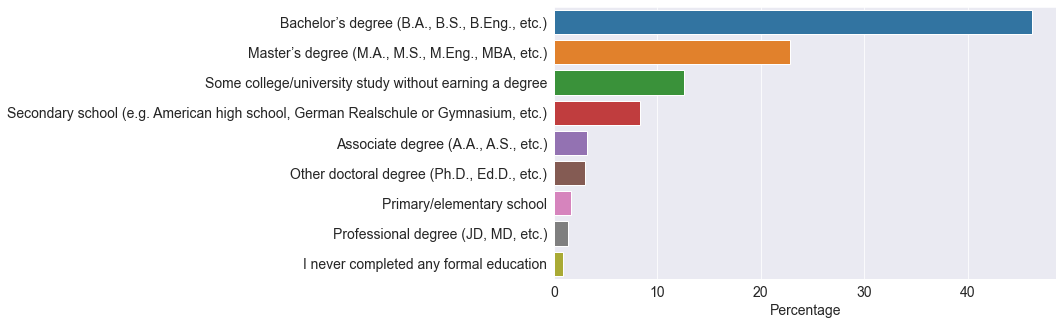

In [93]:
sns.barplot(x=EdLev_per, y=EdLev_per.index)
plt.xlabel("Percentage");

In [68]:
schema.UndergradMajor

'What was your primary field of study?'

In [96]:
resp_major = survey_df.UndergradMajor.value_counts(dropna=False)
resp_major

Computer science, computer engineering, or software engineering                   31353
NaN                                                                               13687
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major        

In [85]:
# Percentage of responces for each specialization
und_grad_per = survey_df.UndergradMajor.value_counts()*100 / survey_df.UndergradMajor.count()
und_grad_per

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

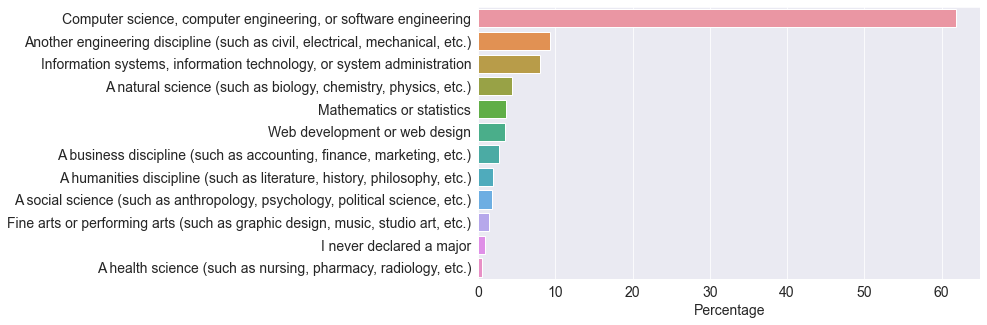

In [87]:
sns.barplot(x=und_grad_per,y=und_grad_per.index)
plt.xlabel("Percentage");

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

In [94]:
survey_df.NEWEdImpt.value_counts()

Fairly important                      12588
Very important                        11783
Somewhat important                    11298
Not at all important/not necessary     7707
Critically important                   4716
Name: NEWEdImpt, dtype: int64

In [117]:
EmpType_per = survey_df.Employment.value_counts(dropna=False)*100/survey_df.Employment.count()

In [118]:
EmpType_per

Employed full-time                                      70.918383
Student                                                 12.199893
Independent contractor, freelancer, or self-employed     8.863615
Not employed, but looking for work                       3.665962
Employed part-time                                       3.470360
NaN                                                      1.438622
Not employed, and not looking for work                   0.501625
Retired                                                  0.380162
Name: Employment, dtype: float64

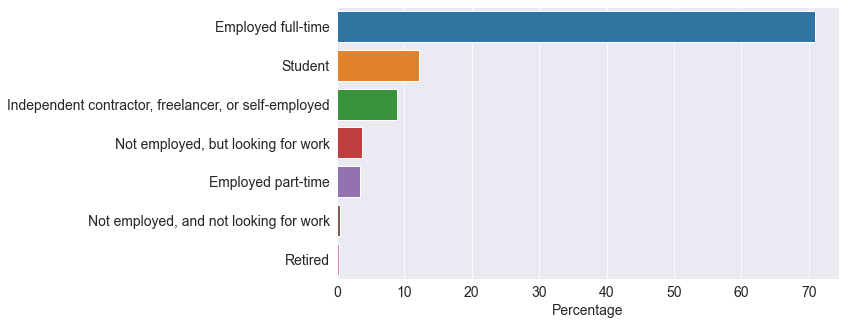

In [122]:
sns.barplot(x=EmpType_per, y=EmpType_per.index)
plt.xlabel("Percentage");

In [127]:
survey_df.DevType.to_frame()

,DevType
0,"Developer, desktop or enterprise applications;..."
1,"Developer, full-stack;Developer, mobile"
2,NaN
3,NaN
4,NaN
...,...
64456,Senior executive/VP
64457,NaN
64458,NaN
64459,NaN


In [129]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column
    for idx, value  in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [130]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [131]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [136]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

#### Q: What are the most popular programming languages in 2020? 

To answer, this we can use the `LanguageWorkedWith` column. Similar to `DevType`, respondents were allowed to choose multiple options here.

In [137]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [138]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [139]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [140]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

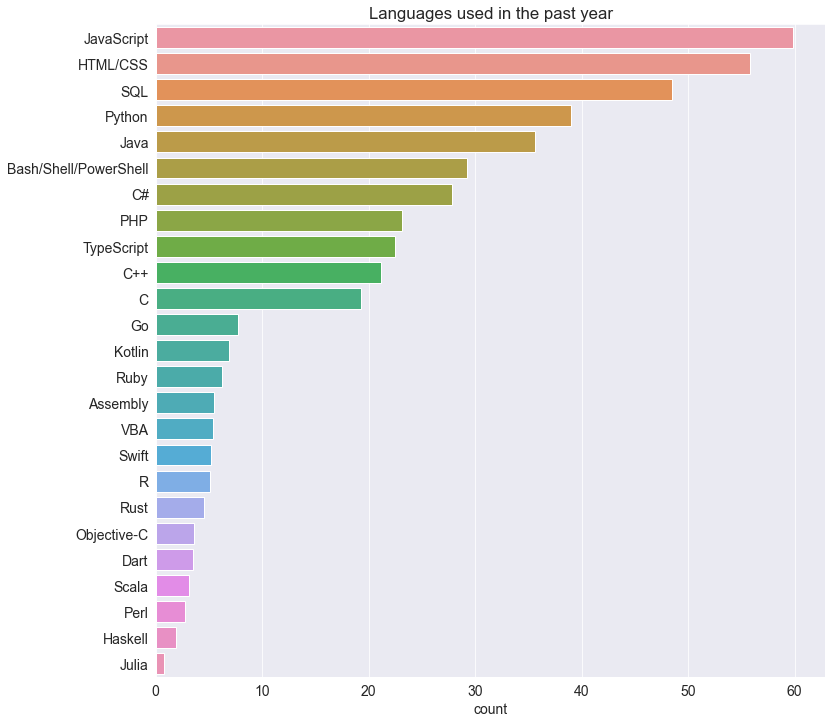

In [141]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_worked_percentages, y=languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');

#### Q: Which languages are the most people interested to learn over the next year?

For this, we can use the `LanguageDesireNextYear` column, with similar processing as the previous one.

In [142]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

Python                   41.143906
JavaScript               40.425466
HTML/CSS                 32.028116
SQL                      30.799614
TypeScript               26.451653
C#                       21.058688
Java                     20.464653
Go                       19.432090
Bash/Shell/PowerShell    18.057413
Rust                     16.270643
C++                      15.014151
Kotlin                   14.760676
PHP                      10.947657
C                         9.359935
Swift                     8.692812
Dart                      7.308805
R                         6.571704
Ruby                      6.425528
Scala                     5.326097
Haskell                   4.593662
Assembly                  3.766367
Julia                     2.540976
Objective-C               2.338818
Perl                      1.761888
VBA                       1.611047
dtype: float64

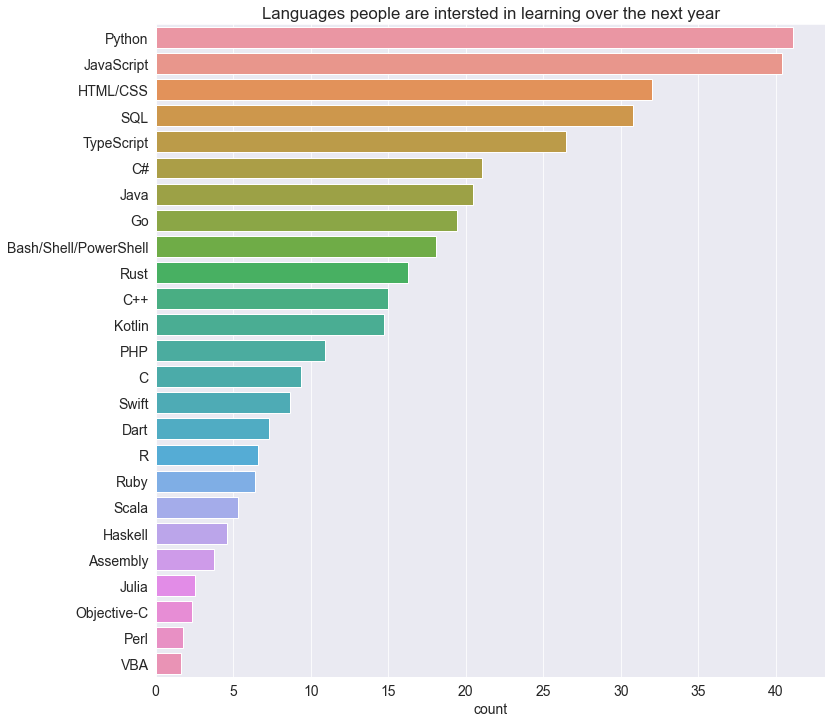

In [143]:
plt.figure(figsize=(12, 12))
sns.barplot(x=languages_interested_percentages, y=languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');